In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##### This notebook is used to classify the ham or spam emails. SMS dataset contains 5572 samples and  5 attributes. 2 main attributes are Label(spam or ham binary value), the message. "Unnamed : 2", "Unnamed: 3", and "Unnamed : 4" 

In [56]:
df = pd.read_csv("spam.csv",encoding = 'latin-1')

In [57]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [58]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [59]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


#### There are a lot of null values in "Unnamed : 2", "Unnamed: 3", and "Unnamed : 4", so we have to drop these columns before processing the dataset.

In [60]:
df = df.rename({"v1":"label","v2":"message"},axis='columns')
df = df[['message','label']]
df

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [61]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### There are 4825 ham emails and 747 spam emails in this dataset. The proportion between ham emails and spam emails is not balanced ( 4825 versus 747)

## Visualizing data

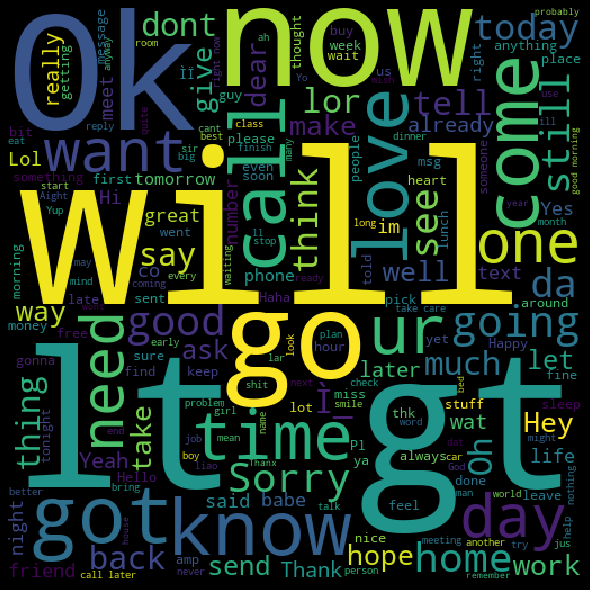

In [62]:
from wordcloud import WordCloud
spam_words = ' '.join(list(df[df['label'] == 'ham']['message']))
spam_wc = WordCloud(width = 512,height=512).generate(spam_words)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Some of the most frequent words occur in ham label:
##### OK, got, come, will, call, now, go, know, take, Sorry 

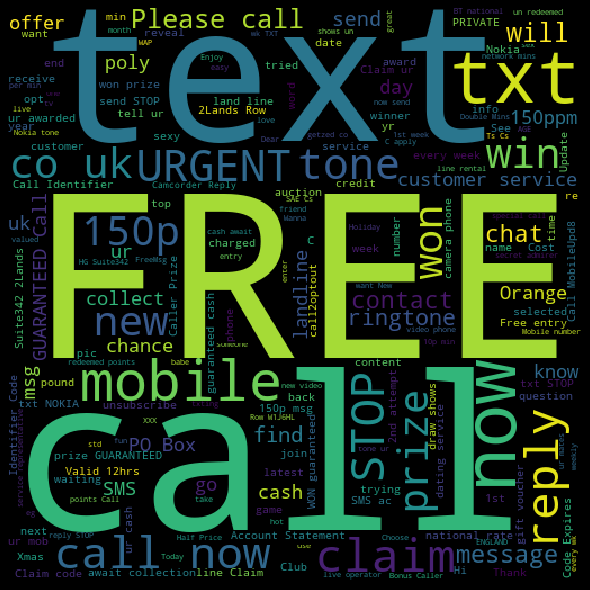

In [63]:
spam_words = ' '.join(list(df[df['label'] == 'spam']['message']))
spam_wc = WordCloud(width = 512,height=512).generate(spam_words)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Some of the most frequent words occur in spam label:
###### Please, FREE, text , now, call, STOP, reply, clain, prize, won

## Balance this data

In [64]:
ham = df[df['label'] =='ham']
ham.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
6,Even my brother is not like to speak with me. ...,ham


In [65]:
spam = df[df['label'] =='spam']
spam.head()

,message,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
5,FreeMsg Hey there darling it's been 3 week's n...,spam
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam
11,"SIX chances to win CASH! From 100 to 20,000 po...",spam


In [66]:
ham.shape, spam.shape

((4825, 2), (747, 2))

In [67]:
ham = ham.sample(spam.shape[0])

#### Balancing the number of datas between the ham and spam.

In [68]:
ham.shape, spam.shape

((747, 2), (747, 2))

In [69]:
data = ham.append(spam,ignore_index = True)
data.reset_index(inplace=True)
data

,index,message,label
0,0,"No shit, but I wasn't that surprised, so I wen...",ham
1,1,K:)k.are you in college?,ham
2,2,"Some friends want me to drive em someplace, pr...",ham
3,3,"Oh, the grand is having a bit of a party but i...",ham
4,4,"Well, I have to leave for my class babe ... Yo...",ham
...,...,...,...
1489,1489,Want explicit SEX in 30 secs? Ring 02073162414...,spam
1490,1490,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,spam
1491,1491,Had your contract mobile 11 Mnths? Latest Moto...,spam
1492,1492,REMINDER FROM O2: To get 2.50 pounds free call...,spam


## Data Preparation

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
data.shape

(1494, 3)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size = 0.3, random_state =0,
                                                   shuffle = True, stratify = data['label'])

## Bag of words creation


In [74]:
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [75]:
X_train = vectorizer.fit_transform(X_train)

In [76]:
X_train.shape

(1045, 3444)

 ## Pipeline and Random Forest for the Balancing data

In [77]:
clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=100,n_jobs = -1))])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size = 0.3, random_state =0,
                                                   shuffle = True, stratify = data['label'])

In [79]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [80]:
y_pred = clf.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 28, 196]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [83]:
accuracy_score(y_test,y_pred)

0.9354120267260579

In [84]:
clf.predict(["Hey what's good"])

array(['ham'], dtype=object)

In [85]:
clf.predict(["WINNER!! You have won the ticket. Please text WON to 445566 "])

array(['spam'], dtype=object)

In [86]:
clf.predict(["Payment Protection Insurance (PPI)IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out."])

array(['spam'], dtype=object)

In [87]:
clf.predict(["Quick Loans A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop"])

array(['spam'], dtype=object)

In [88]:
clf.predict(["Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP"])

array(['spam'], dtype=object)

## Pipeline and Random Forest for Original data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size = 0.3, random_state =0,
                                                   shuffle = True, stratify = df['label'])
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X_train = vectorizer.fit_transform(X_train)
clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=100,n_jobs = -1))])
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size = 0.3, random_state =0,
                                                   shuffle = True, stratify = df['label'])


In [90]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [91]:
y_pred = clf.predict(X_test)

In [92]:
confusion_matrix(y_test,y_pred)

array([[1447,    1],
       [  44,  180]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [94]:
accuracy_score(y_test,y_pred)

0.9730861244019139

In [95]:
clf.predict(["Hey what's good"])

array(['ham'], dtype=object)

In [96]:
clf.predict(["You’ve Won!"])

array(['ham'], dtype=object)

In [97]:
clf.predict(["The IRS is Trying to Contact You"])

array(['ham'], dtype=object)

In [98]:
clf.predict(["You Have a Refund Coming"])

array(['ham'], dtype=object)

In [99]:
clf.predict(["Payment Protection Insurance IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out."])

array(['ham'], dtype=object)

In [100]:
clf.predict(["Quick Loans A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop"])

array(['spam'], dtype=object)

# Conclusion

### When we train the balancing dataset, it gives the lower accuracy ( 93.5%) but the prediction is more reliable because we scale the ham label down to match the number of the spam label

### The original dataset gives a higher accuracy (97.1%) but because the unbalance between of ham and spam messages, the prediction is "ham" most of the time , probably leading to the overfitting.